In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [4]:
pd.set_option('display.max_rows', 600)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 2000)
pd.set_option('display.max_colwidth', 1000)

In [5]:
data=pd.read_csv('database/extra/data_clean_8May.csv', index_col='idx')

In [6]:
data=data.drop(columns='Unnamed: 0')

In [7]:
data.head()

,_No,Month,Time,Place_refer,State,Radial,Distance,MCondition,Visibility,Light,Ceiling,AC1_ATC,AC1_Operator,AC1_Model,AC1_Crew,AC1_Rule,AC1_FP,AC1_Mission,AC1_Nav,AC1_Phase,AC1_Route,AC1_Airspace,AC1_Seats,AC1_Passengers,AC2_ATC,AC2_Operator,AC2_Model,AC2_Crew,AC2_Rule,AC2_FP,AC2_Mission,AC2_Nav,AC2_Phase,AC2_Route,AC2_Airspace,AC2_Seats,AC2_Passengers,P1_Loc,P1_Org,P1_Func,P1_Qual,P1_Experience,P1_HumaFactor,P2_Loc,P2_Org,P2_Func,P2_Qual,P2_Experience,Anomaly,Detector,Result,Other_Factors,Pri_Problem,Narrative,Synopsis,Altitude
idx,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,79912,198801,1201-1800,SEA; BFI,WA,0.0,6.0,VMC,None,Daylight,None,TRACON SEA; Tower BFI,Personal,Small Aircraft; Low Wing; 1 Eng; Fixed Gear,1,None,VFR,Personal,None,Climb; Takeoff; Initial Climb,None,Class B SEA,0,0,None,None,None,None,None,None,None,None,None,None,None,0,0,None,Other Nonprofessional GA,Pilot Flying; Single Pilot,Flight Crew Private,Flight Crew Last 90 Days 5; Flight Crew Total 108; Flight Crew Type 83,None,None,None,Local,Air Traffic Control Fully Certified,None,Deviation - Procedural FAR; Other Airspace Violation Entry or Exit,Person Air Traffic Control,Flight Crew Exited Penetrated Airspace,None,Human Factors,THIS WAS MY FIRST DEP FROM BFI ON 31L. MY TURN TO THE SOUTH WAS PREMATURE. BFI TWR ALERTED ME TO THE PENETRATION AT WHICH TIME A VECTOR WAS GIVEN TO MOVE ME OUT OF THE TCA.,SMA PENETRATED TCA ON CLIMB OUT.,900.0
2,79965,198801,1201-1800,DEN,CO,0.0,20.0,VMC,20,Daylight,None,TRACON DEN; Tower APA,Personal,Small Transport; Low Wing; 2 Recip Eng,1,None,None,Personal,None,Descent; Descent,None,Class B DEN,0,0,None,None,None,None,None,None,None,None,None,None,None,0,0,None,Other Nonprofessional GA,Single Pilot; Pilot Flying,Flight Crew Air Transport Pilot (ATP),Flight Crew Last 90 Days 100; Flight Crew Total 2000; Flight Crew Type 350,None,None,None,None,None,None,Deviation - Procedural FAR; Inflight Event / Encounter Weather / Turbulence; Other Airspace Violation Entry or Exit,Person Air Traffic Control,General None Reported / Taken,None,Human Factors,A VFR FLT; BEING CONDUCTED UNDER FAR PART 91; WAS APCHING DENVER CENTENNIAL ARPT (APA) FROM THE SW. ATIS INDICATED VISUAL APCH TO RWY 35L/R IN USE. DSCNT WAS COMMENCED FROM 17500' MSL; 50 SW OF APA; PLANNING A FINAL APCH ALT OF 7500 MSL WITH A TARGET ALT OF 8000 MSL 20 SW OF DEN. AT APPROX 13000' MSL; 30 SW OF DEN; HDG 060 DEG MAGNETIC; IAS OF 200 KTS; SEVERE TURB WAS ENCOUNTERED (SIGMET FOR SUCH WAS CURRENT). THE ACFT WAS SLOWED TO DESIGN MANEUVERING SPD (155 KTS); TEMPORARILY STOPPING DSCNT. TO AVOID TCA CONFLICT A 30 DEG RIGHT TURN (TO 090 DEG MAGNETIC) WAS MADE. DME INFO FROM DEN VORTAC INDICATED POSITION OUTSIDE TCA. SEVERE TURB AND COCKPIT WORKLOAD PREVENTED RETUNING NAV RECEIVER TO 110.3 MHZ (DEN 26L ILS AND NAV FAC UPON WHICH TCA IS PREDICATED; APPROX 1 1/2 NM SSW OF DEN VORTAC); HOWEVER; VISUAL INFO INDICATED POSITION TO CONTINUE TO BE OUTSIDE OF TCA UNTIL 10000' MSL REACHED WHEN HDG 080 DEG MAGNETIC ASSUMED FOR 'WIDE LEFT BASE; OUTSIDE POWER LINES TO 35R' AS ADVISED BY AP...,SMT PLT DESCENDED TO ARPT UNDERLYING TCA; ACCUSED OF PENETRATING TCA.,7500.0
6,80007,198801,1201-1800,EMI,MD,0.0,25.0,VMC,None,Daylight,None,Center ZDC,Air Carrier,Large Transport; Low Wing; 3 Turbojet Eng,3,None,IFR,Passenger,None,Descent; Descent,None,Class E ZDC,0,0,None,Air Carrier,Medium Large Transport; Low Wing; 2 Turbojet Eng,2,None,IFR,Passenger,None,Climb; Cruise,None,None,0,0,None,Government,Enroute,Air Traffic Control Fully Certified,Air Traffic Control Radar 18,None,None,None,Captain; Pilot Flying,Flight Crew Air Transport Pilot (ATP),None,ATC Issue All Types; Conflict Airborne Conflict,Person Air Traffic Control,Air Traffic Control Issued New Clearance; General None Reported / Taken,None,Human Factors,ACR Y CLIMBING TO FL210 WAS STOPPED AT 160 FOR TFC AT 170; WHICH PASSED. ACR Y WAS THEN KEPT AT 160. ACR X WAS DESCENDED TO 170 UNTIL CLEAR OF TFC; THEN DESCENDED TO 150 . ACR X WAS 

In [8]:
data.Pri_Problem.unique()

array(['Human Factors', 'Ambiguous', 'Weather', 'Airport', 'None',
       'ATC Equipment / Nav Facility / Buildings', 'Aircraft',
       'Chart Or Publication', 'Company Policy',
       'Environment - Non Weather Related', 'Airspace Structure',
       'Procedure', 'Manuals', 'Equipment / Tooling', 'Staffing', 'MEL',
       'Logbook Entry', 'Incorrect / Not Installed / Unavailable Part'],
      dtype=object)

In [9]:
data.Pri_Problem.value_counts()

Human Factors                                   67311
Ambiguous                                        5259
Procedure                                        4122
None                                             3598
Weather                                          3017
Company Policy                                   2582
Aircraft                                         1428
ATC Equipment / Nav Facility / Buildings          910
Chart Or Publication                              894
Airspace Structure                                881
Airport                                           799
Environment - Non Weather Related                 553
Staffing                                          109
Equipment / Tooling                               104
Manuals                                            80
MEL                                                12
Incorrect / Not Installed / Unavailable Part        8
Logbook Entry                                       2
Name: Pri_Problem, dtype: in

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


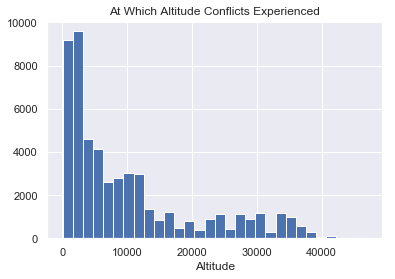

In [10]:
sns.set()
plt.hist(data.Altitude,bins=30,range=(10,47000))
plt.title('At Which Altitude Conflicts Experienced')
plt.xlabel('Altitude')
plt.show()

In [11]:
def ecdf(data):
    n= len(data)
    x=np.sort(data)
    y=np.arange(1,n+1)/n
    return x, y

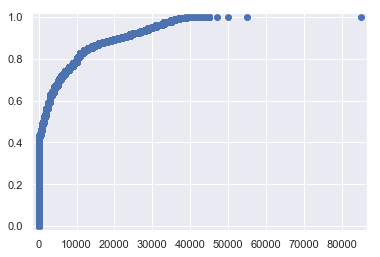

In [12]:
X,y=ecdf(data.Altitude)
plt.plot(X,y,marker='o', linestyle='none')
plt.margins(0.02)
plt.show()

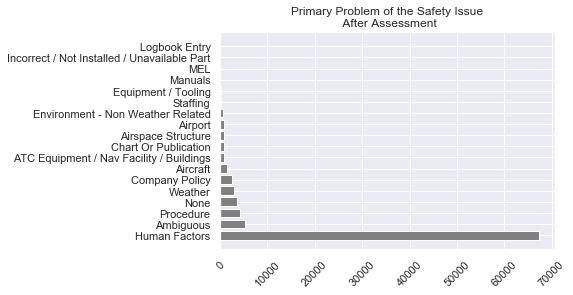

In [13]:
Pri_problem=data.Pri_Problem.value_counts()
plt.barh(Pri_problem.index,Pri_problem.values, color='gray')
plt.title('Primary Problem of the Safety Issue\n After Assessment')
plt.xticks(rotation=45)
plt.show()

In [14]:
Pri_problem

Human Factors                                   67311
Ambiguous                                        5259
Procedure                                        4122
None                                             3598
Weather                                          3017
Company Policy                                   2582
Aircraft                                         1428
ATC Equipment / Nav Facility / Buildings          910
Chart Or Publication                              894
Airspace Structure                                881
Airport                                           799
Environment - Non Weather Related                 553
Staffing                                          109
Equipment / Tooling                               104
Manuals                                            80
MEL                                                12
Incorrect / Not Installed / Unavailable Part        8
Logbook Entry                                       2
Name: Pri_Problem, dtype: in

In [21]:
67311+5259+4122


76692

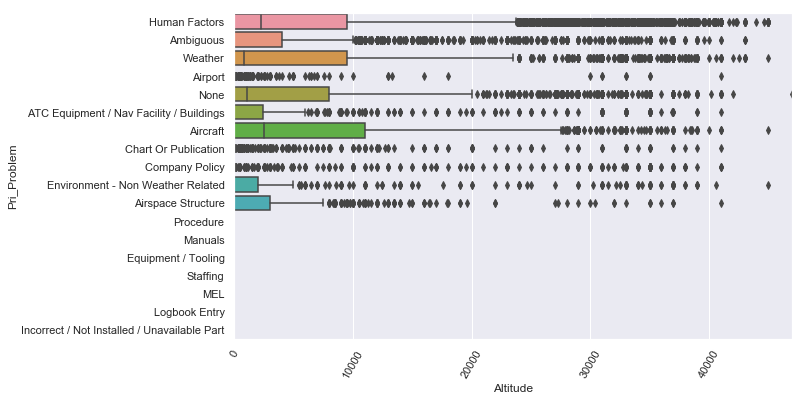

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(y=data.Pri_Problem, x=data.Altitude)
plt.xticks(rotation=60)
plt.xlim(0,47000)
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text xticklabel objects>)

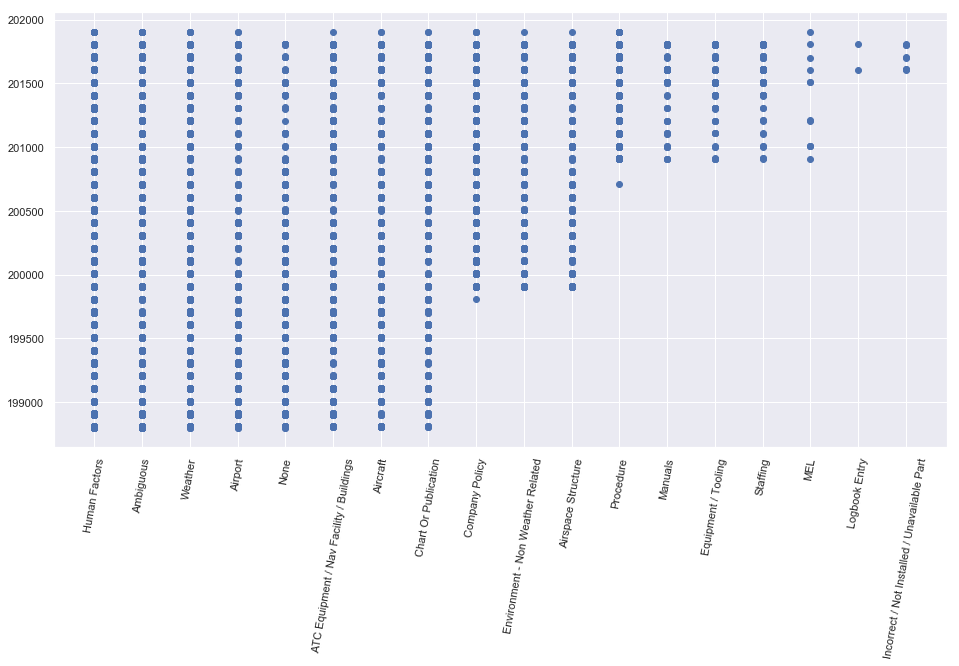

In [16]:
plt.figure(figsize=(16,8))
plt.scatter(data.Pri_Problem, data.Month)
plt.xticks(rotation=80)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text xticklabel objects>)

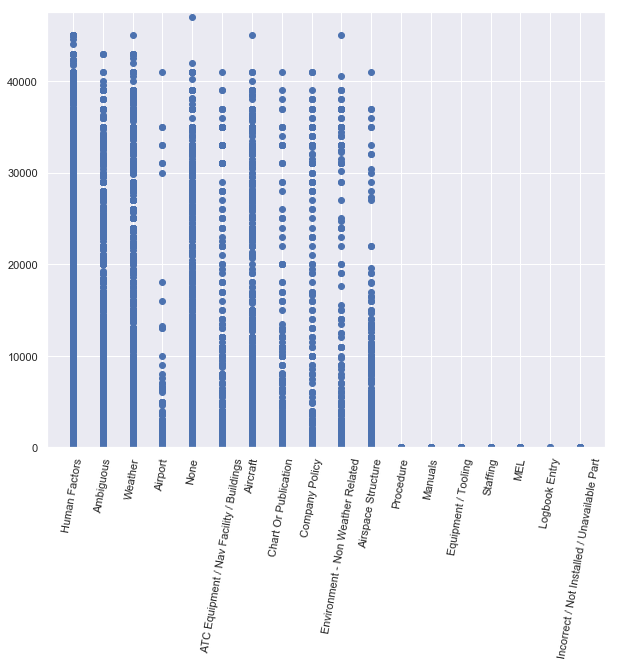

In [17]:
plt.figure(figsize=(10,8))
plt.scatter(data.Pri_Problem, data.Altitude)
plt.ylim(0,47500)
plt.xticks(rotation=80)

In [18]:
df=data[['Pri_Problem', 'Synopsis', 'Narrative']]

In [19]:
df.head()

,Pri_Problem,Synopsis,Narrative
idx,,,
1,Human Factors,SMA PENETRATED TCA ON CLIMB OUT.,THIS WAS MY FIRST DEP FROM BFI ON 31L. MY TURN TO THE SOUTH WAS PREMATURE. BFI TWR ALERTED ME TO THE PENETRATION AT WHICH TIME A VECTOR WAS GIVEN TO MOVE ME OUT OF THE TCA.
2,Human Factors,SMT PLT DESCENDED TO ARPT UNDERLYING TCA; ACCUSED OF PENETRATING TCA.,A VFR FLT; BEING CONDUCTED UNDER FAR PART 91; WAS APCHING DENVER CENTENNIAL ARPT (APA) FROM THE SW. ATIS INDICATED VISUAL APCH TO RWY 35L/R IN USE. DSCNT WAS COMMENCED FROM 17500' MSL; 50 SW OF APA; PLANNING A FINAL APCH ALT OF 7500 MSL WITH A TARGET ALT OF 8000 MSL 20 SW OF DEN. AT APPROX 13000' MSL; 30 SW OF DEN; HDG 060 DEG MAGNETIC; IAS OF 200 KTS; SEVERE TURB WAS ENCOUNTERED (SIGMET FOR SUCH WAS CURRENT). THE ACFT WAS SLOWED TO DESIGN MANEUVERING SPD (155 KTS); TEMPORARILY STOPPING DSCNT. TO AVOID TCA CONFLICT A 30 DEG RIGHT TURN (TO 090 DEG MAGNETIC) WAS MADE. DME INFO FROM DEN VORTAC INDICATED POSITION OUTSIDE TCA. SEVERE TURB AND COCKPIT WORKLOAD PREVENTED RETUNING NAV RECEIVER TO 110.3 MHZ (DEN 26L ILS AND NAV FAC UPON WHICH TCA IS PREDICATED; APPROX 1 1/2 NM SSW OF DEN VORTAC); HOWEVER; VISUAL INFO INDICATED POSITION TO CONTINUE TO BE OUTSIDE OF TCA UNTIL 10000' MSL REACHED WHEN HDG 080 DEG MAGNETIC ASSUMED FOR 'WIDE LEFT BASE; OUTSIDE POWER LINES TO 35R' AS ADVISED BY AP...
6,Human Factors,LESS THAN STANDARD SEPARATION BETWEEN TWO ACR ACFT.,ACR Y CLIMBING TO FL210 WAS STOPPED AT 160 FOR TFC AT 170; WHICH PASSED. ACR Y WAS THEN KEPT AT 160. ACR X WAS DESCENDED TO 170 UNTIL CLEAR OF TFC; THEN DESCENDED TO 150 . ACR X WAS NOT OUT OF 170 WHEN CLRNC ISSUED TO STOP AT 170. NO ANSWER. CLRNC GIVEN AGAIN. NO ANSWER. TURNED ACR Y FROM 320 DEG TO 250 DEG HDG. CLRNC TO ACR X AGAIN WITH TURN TO 060 DEG; NO ANSWER. FINALLY ACR X ANSWERED AND TURNED TO 060 DEG WITH CLIMB BACK TO 170. ACFT PASSED 4.3 MI AND 200' APART. ACR X DID NOT RESPOND TO CLRNC. POSSIBLE LACK OF COCKPIT DISCIPLINE.
7,Human Factors,ACR LTT LANDED AT THE WRONG ARPT; DESTINATION WAS SBP BUT LANDED AT SMX.,SOME TIME HAD PASSED AFTER WE HAD PASSED THE RZS VOR INBND TO SBP. I USED MY FAMILIARIZATION WITH THE AREA'S GND LIGHTING TO DETERMINE THAT WE WERE APCHING THE SMX-SBP AREA. ALSO; I DETERMINED THAT DUE TO OUR CLOSE PROX TO THE AREA THAT WE NEEDED TO START A DES RATHER QUICKLY. OTHERWISE; WE COULD NOT HAVE BEEN ABLE TO MEET THE LTT'S DES LIMITATION OF A MAX 1000 FPM RATE OF DES AND STILL BE ABLE TO MAINTAIN A REASONABLE SPD TO THE ARPT. I ASKED ATC FOR A LOWER ALT AND WAS ASSIGNED TO 7000'. IN MY OPINION THIS ALT WAS STILL TOO HIGH TO MEET THE LTT'S LIMITATION SO I STARTED LOOKING FOR THE ARPT IN ORDER TO BE ASSIGNED A VISUAL APCH AND UNRESTRICTED LOWER ALT. WHEN APCHING THE SMX-SBP AREA FROM THE S; SBP IS THE LAST CLUSTER OF LIGHTS SIGHTED BEFORE CONTINUING TO THE N. BOTH THE F/O AND I SIGHTED AN ARPT BEACON IN WHAT APPEARED TO BE THE LAST CLUSTER OF LIGHTS. WE BOTH ASSUMED THIS TO BE SBP SO I CALLED THE ARPT IN SIGHT TO ATC. (WE ACTUALLY COULD NOT SEE SBP BECAUSE OF REDUCED VIS. I...
8,Human Factors,LESS THAN STANDARD SEPARATION BETWEEN FLT OF 2 FGT ACFT AND GA-TWIN ON APCH.,ACFT X ON FINAL FOR RWY 30L (FLT OF 2) MISSED APCH 3/4 MI FINAL. TWR HAD DEP TFC OFF THE LEFT RWY AND RIGHT RWY. TWR ISSUED STANDARD MISSED APCH ALT OF 2500' MSL AND A TURN TO HDG 350 DEGS TO AVOID DEP TFC. THE CC INSTRUCTED LCL CTL TO CHANGE THE MISSED APCH TO APCH. LCL CTL COMPLIED. THE LOW ALT CTLR HAD GA TWIN Y FOR RWY 24 TURNING FINAL AT 2000'. THE X FLT LEVELED AT 2500' AND TURNED SHARPLY TO HDG 350 DEGS. DUE TO THE SHARP TURN; THE FLT WAS ON A PATH CONVERGING ON THE ARRIVING ACFT Y. VISUAL SEP WAS OBTAINED FROM ACFT Y. THE FLT FLEW 500' ABOVE Y. W/O THE VISUAL SEP; THERE WAS NO IFR SEP. STL IS ALREADY RE-EVALUATING THE STANDARD 2500' MISSED APCH ALT AND LOOKING AT UTILIZING 3000' TO INSURE THE 1000' NECESSARY FOR IFR SEP.


In [20]:
df.to_csv('database/extra/data_NLP.csv')